# Sentiment analysis model

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import torch

# Loading our dataset

In [131]:
# loading reviews dataset
reviews = tf.keras.utils.text_dataset_from_directory(
    'data/train',
    batch_size=32,
    seed=123,
)
reviews.class_names

Found 25000 files belonging to 2 classes.


['neg', 'pos']

In [132]:
texts = []
labels = []

for batch, label in reviews:
    batch_texts = [t.decode("utf-8") for t in batch.numpy()]
    texts.extend(batch_texts)
    labels.extend(label.numpy())



In [133]:
# print 1 examples text and its label
# print('text', texts[1])
# print('label', labels[1])
# print('text2' , texts[2])
# print('label2' , labels[2])
# print('text3' , texts[3])
# print('label3' , labels[3])
# print('text4' , texts[4])
# print('label4' , labels[4])
print('text5' , texts[5])
print('label5' , labels[5])

text5 In this 1943 film, Judy Garland is deemed not to be ready for the big-time yet by the man who loves her-Van Heflin. This film was certainly a big change for Mr. Heflin, especially after his supporting Oscar win the year before in "Johnny Eager."<br /><br />Wasn't Spring Byington too old to be the widowed mother of 5 children, with four of them appearing to look like her grandchildren?<br /><br />The singing and dancing are just marvelously staged but the way that the blossoming romance between Heflin and Garland was depicted left a lot to be desired. It was a Gigi-like one where a young girl is eventually swept off her feet by a charmer.
label5 1


# Embedding the reviews for sentiment analysis 

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# review_embeddings = model.encode(texts, show_progress_bar=True , batch_size=32)

Batches:   0%|          | 0/782 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 782/782 [11:28<00:00,  1.14it/s]


In [ ]:
# # save the embeddings
# np.save('models/review_embeddings.npy', review_embeddings)
# np.save('models/review_labels.npy', labels)


In [140]:
reviews_emb = np.load('models/review_embeddings.npy')
labels = np.load('models/review_labels.npy')
reviews_emb.shape, labels.shape

((25000, 384), (25000,))

In [141]:
print(f"review 5" , reviews_emb[5].shape)
print(f"label 5" , labels[5])

review 5 (384,)
label 5 1


# Building the Neural Network

In [253]:
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential  
from tensorflow.keras.regularizers import l2


sentiment_model = Sequential([
    Input(shape=(384,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
sentiment_model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,409 (193.00 KB)

 Trainable params: 49,409 (193.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and fitting our model

In [254]:
from tensorflow.keras.callbacks import EarlyStopping
sentiment_model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
sentiment_model.fit(reviews_emb, labels, epochs=11 ,validation_split=0.2)

Epoch 1/11


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7320 - loss: 0.5420 - val_accuracy: 0.8022 - val_loss: 0.4285
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8039 - loss: 0.4229 - val_accuracy: 0.8074 - val_loss: 0.4187
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8152 - loss: 0.4059 - val_accuracy: 0.8092 - val_loss: 0.4125
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8216 - loss: 0.3939 - val_accuracy: 0.8132 - val_loss: 0.4057
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8226 - loss: 0.3931 - val_accuracy: 0.8156 - val_loss: 0.4049
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8335 - loss: 0.3731 - val_accuracy: 0.8178 - val_loss: 0.3992
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8394 - loss: 0.3639 - val_accuracy: 0.8146 - val_loss: 0.4017
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3571 - val_accuracy: 0.8252 - val_

In [271]:
# save the model
sentiment_model.save('models/sentiment_modelv2.keras')
# load the model
# sentiment_model = tf.keras.models.load_model('models/sentiment_modelv1.keras')


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


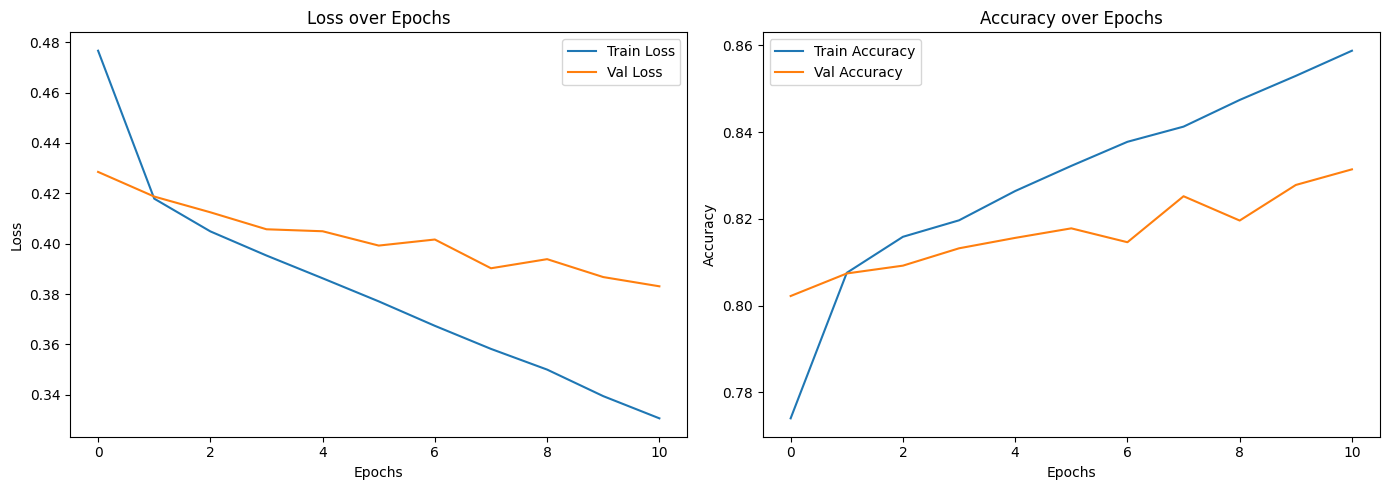

In [270]:
import matplotlib.pyplot as plt

history = sentiment_model.history.history
print(history.keys())
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  
axs[0].plot(history['loss'], label='Train Loss')
axs[0].plot(history['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()
axs[1].plot(history['accuracy'], label='Train Accuracy')
axs[1].plot(history['val_accuracy'], label='Val Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].legend()
plt.tight_layout()
plt.show()


# Testing on Test set

In [169]:
# model evaluation
test_reviews = tf.keras.utils.text_dataset_from_directory(
    'data/test',
    batch_size=32,
    seed=123,
)

test_texts = []
test_labels = []

for batch, label in test_reviews:
    batch_texts = [t.decode("utf-8") for t in batch.numpy()]
    test_texts.extend(batch_texts)
    test_labels.extend(label.numpy())



Found 25000 files belonging to 2 classes.


In [ ]:
# test_emb = model.encode(test_texts, show_progress_bar=True, batch_size=32)
# np.save('models/test_embeddings.npy', test_emb)


Batches:   0%|          | 0/782 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 782/782 [10:56<00:00,  1.19it/s]


In [210]:
test_emb = np.load('models/test_embeddings.npy')


In [256]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_probs = sentiment_model.predict(test_emb)
pred_labels = (pred_probs > 0.5).astype(int).flatten()
true_labels = np.array(test_labels)
acc = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=['neg', 'pos']))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.8158

Classification Report:
              precision    recall  f1-score   support

         neg       0.81      0.82      0.82     12500
         pos       0.82      0.81      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000


Confusion Matrix:
[[10249  2251]
 [ 2354 10146]]


# Testing on Real world Inputs

In [269]:
texts = [
    'This product exceeded my expectations! The quality is amazing and delivery was super fast.', 
    'I was really disappointed. The item arrived damaged and customer service was unhelpful.',
    "It's okay, nothing special but does the job. Not great, not terrible.",
    "Absolutely love it! Ive been using it every day and it works perfectly.",
    "Terrible experience. The product stopped working after just one week.",
    "This product is fantastic! Highly recommend it.",
    "I don't like this product at all. its a waste of money",
]
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)
predictions = sentiment_model.predict(embeddings)

print(predictions)      

for pred in predictions:
    if pred[0] < 0.5:
        print("Negative sentiment detected.")
    else:
        print("Positive sentiment detected.")


Batches: 100%|██████████| 1/1 [00:00<00:00, 35.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.99997354]
 [0.84440017]
 [0.98174685]
 [0.9999997 ]
 [0.13207987]
 [0.99999774]
 [0.4936828 ]]
Positive sentiment detected.
Positive sentiment detected.
Positive sentiment detected.
Positive sentiment detected.
Negative sentiment detected.
Positive sentiment detected.
Negative sentiment detected.


In [262]:
predictions = (predictions > 0.5).astype(int).flatten()
true_labels_texts = np.array([1, 0, 1, 1, 0 , 1 , 0])  # Example true labels for the custom texts
print(sklearn.metrics.accuracy_score(true_labels_texts,predictions))
print(classification_report(true_labels_texts, (predictions > 0.5).astype(int).flatten(), target_names=['neg', 'pos']))
print(confusion_matrix(true_labels_texts, predictions))

0.8571428571428571
              precision    recall  f1-score   support

         neg       1.00      0.67      0.80         3
         pos       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

[[2 1]
 [0 4]]
